Act 3. Fundamentos Big Data

Alumno: Jose Sepulveda

## Actividad 1

**Primera parte de la actividad 4** (hasta 6 puntos)

El/la alumno/a deberá entregar el propio .ipynb del manual.
La idea es que se trate de entender lo mejor posible, se podrían preguntar las dudas respecto a esta primera parte.

A continuación deja alguna celda en blanco en el propio .ipynb Y continúa con la segunda parte de la actividad..

Responde a cada pregunta a continuación de la misma, y todas ellas en celdas del .ipynb diferentes (debes entregar todo en el mismo archivo .ipynb) 

Pregunta 1 

Respuesta 1 

Pregunta 2 

Respuesta 2 ..

**Respuesta**:

In [1]:
# principales dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# importamos algunos algoritmos de clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
# una posible forma para evaluar nuestro modelo
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
len(df)

891

In [11]:
df.shape

(891, 11)

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Conclusiones:*** 

<lo>
    <li> Existen columnas con "missing values" (valores que faltan)
<lo>  

In [13]:
# y aqui vemos cuantas columnas tienen valores que faltan
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
F2             3
              ..
E12            1
D19            1
C95            1
E10            1
B82 B84        1
Name: Cabin, Length: 147, dtype: int64

In [15]:
# los "nan" significa que el dato no fue encontrado
for cabina in df.Cabin:
    print(cabina)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [17]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

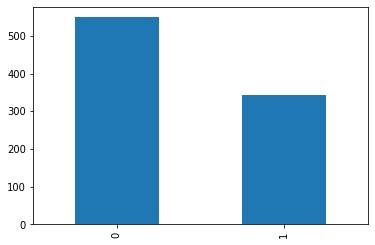

In [19]:
df.Survived.value_counts().plot(kind="bar")
plt.show()

In [20]:
# seleccionar informacion de forma concreta, opcion 1
df["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [21]:
# seleccionar informacion de forma concreta, opcion 2
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [22]:
# seleccionar informaciond de fomra concreta, opcion 3: crosstab
pd.crosstab(df.Sex, df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


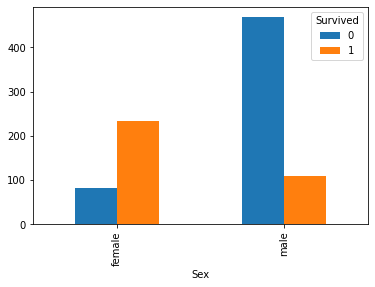

In [23]:
pd.crosstab(df.Sex, df.Survived).plot(kind="bar")
plt.show()

***Conclusiones:***
<lo>
    <li> La mayoría de mujeres sobrevivieron
    <li> La mayoría de hombres no sobrevivieron
<lo>

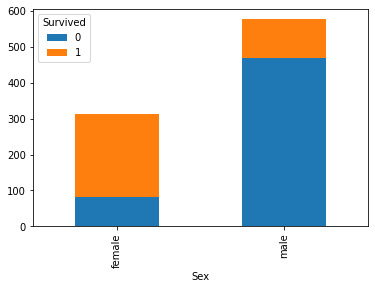

In [24]:
# otra forma de visualizarlo
pd.crosstab(df.Sex, df.Survived).plot(kind="bar", stacked=True)
plt.show()

***Conclusiones:***
<lo>
    <li> En esta gráfica se puede ver que habían casi el doble de hombres que de mujeres
<lo>

In [26]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


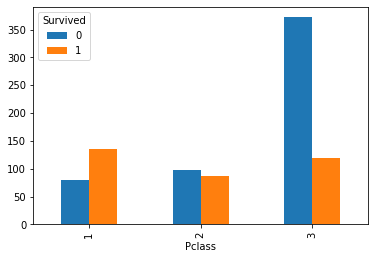

In [28]:
pd.crosstab(df.Pclass, df.Survived).plot(kind="bar")
plt.show()

***Conclusiones:***
<lo>
    <li> La mayoría de persona de tercera clase no sobrevivieron
<lo>

In [29]:
# seleccionar informacion de forma concreta, forma 4: groupby
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

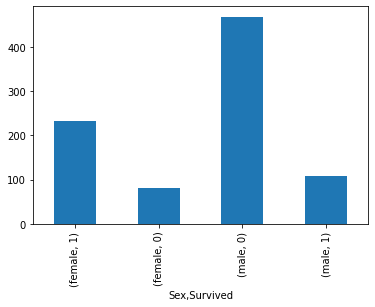

In [31]:
df.groupby("Sex").Survived.value_counts().plot(kind="bar")
plt.show()

In [32]:
# seleccionar informacion de forma concreta, forma 5
df_sex_uno = df[df.Pclass==1]
df_sex_uno.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [33]:
# selecciono
df_sex_uno_crosstab = df[df.Pclass==1]["Survived"]
df_sex_uno_crosstab

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

In [36]:
# CREANDO NUEVOS DATAFRAMES

# supervivencia a 1 --> todos los que sobreviven
df_sobreviven_todos = df[df.Survived == 1]
# suepervivenca a 0 --> todos los que no sobreviven
df_sobreviven_ninguno = df[df.Survived == 0]
# supervivencia a 1 - sex = hombre --> hombres que sobreviven
hombres_supervivientes = df[(df.Survived == 1) & (df.Sex == "male")]
# supervivencia a 1 - sex == mujer --> mujeres que sobreviven
mujeres_supervivientes = df[(df.Survived == 1) & (df.Sex == "female")]
# supervivencia a 0 - sex = hombre --> hombres que NO sobreviven
hombres_no_supervivientes = df[(df.Survived == 0) & (df.Sex == "male")]
# supervivencia a 0 - sex == mujer --> mujeres que no sobreviven
mujeres_no_supervivientes = df[(df.Survived == 0) & (df.Sex == "female")]

#probamos
df_sobreviven_todos.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [38]:
df_sobreviven_todos.Survived.value_counts(3)

1    1.0
Name: Survived, dtype: float64

In [40]:
df_sobreviven_ninguno.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [41]:
hombres_supervivientes.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,NaN,S
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5,A6,S


In [42]:
mujeres_supervivientes.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [43]:
hombres_no_supervivientes.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [44]:
mujeres_no_supervivientes.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
40,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S


In [45]:
# funcion para hacer graficas de forma automatica
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


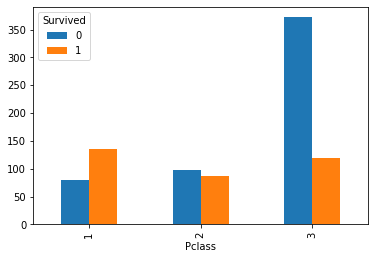

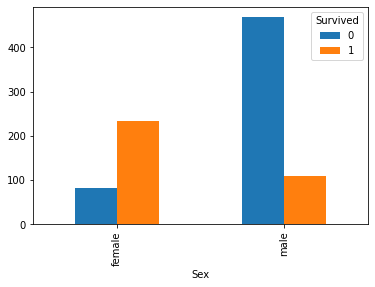

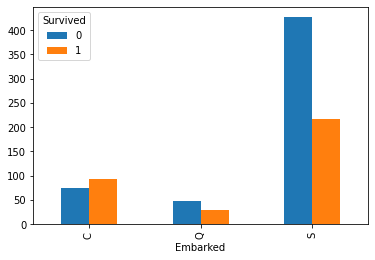

In [46]:
# pd.crosstab(df.Sex, df.Survived)

opciones = ["Pclass", "Sex", "Embarked"]

for opcion in opciones:
    pd.crosstab(df[opcion], df.Survived).plot(kind="bar")
    plt.show()

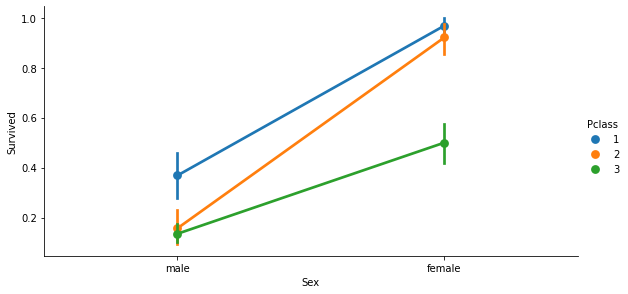

In [47]:
sns.catplot(data=df, x="Sex", y="Survived", hue="Pclass", kind="point", height=4, aspect=2)
plt.show()

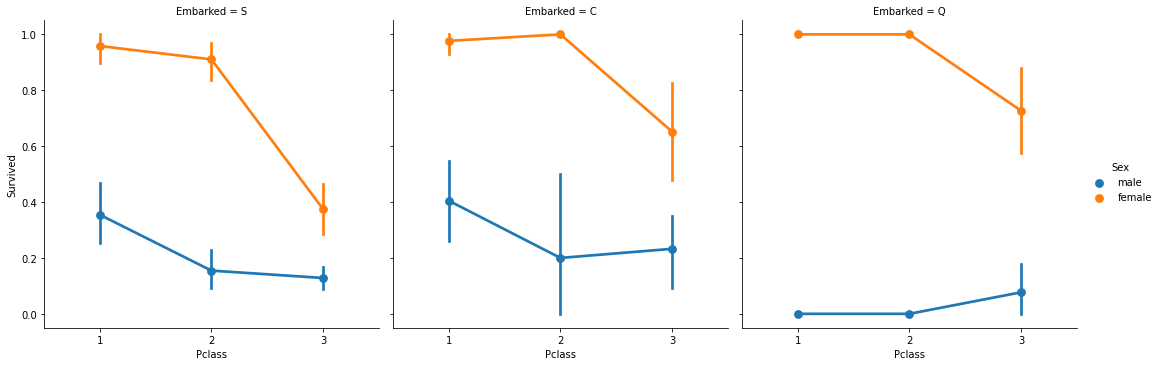

In [49]:
sns.catplot(data=df, x="Pclass", y="Survived", hue="Sex", col="Embarked", kind="point")
plt.show()

***Algunas conclusiones:***
<lo>
    <li> En la gráfica de embarked="S". Las **mujeres** de las **clase 3** que embarcaron en **S** fallecieron muchas en comparación con la clase 1 y 2. Pese a ello sobrevivieron algo mas que los hombres de clase 1 embarcando del mismo _embarked_.
    <li> Los **hombres** con mayor porcentaje de **supervivencia** embarcaron por **C**.
    <li> Los hombres con menor porcentaje de supervivencia embarcaron por **Q**.
    <li> Vemos nuevamente como la maryoría de mujeres sobrevivieron, pero no los hombres.
<lo>

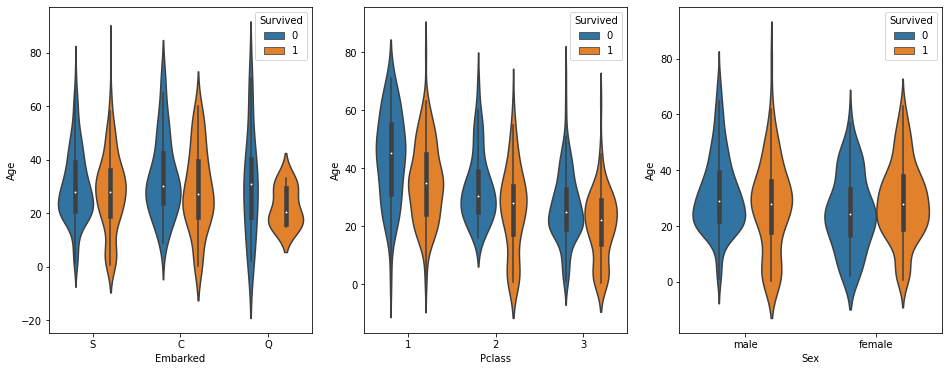

In [50]:
# creo una figura
fig = plt.figure(figsize=(16,6))
# 3 subplots
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, ax=ax3)

plt.show()

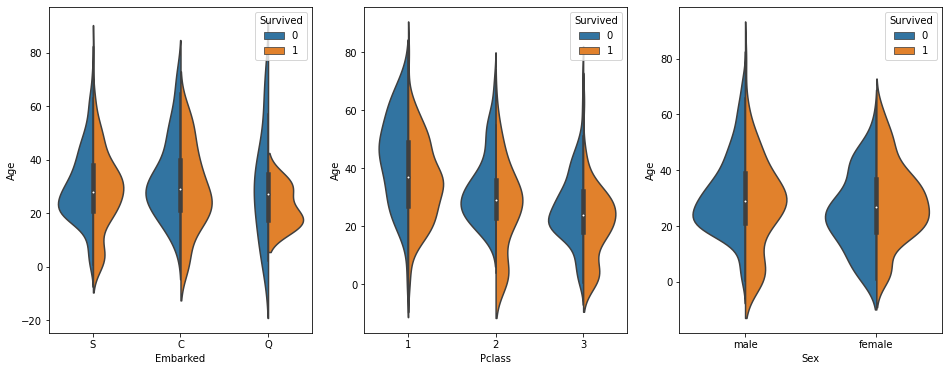

In [51]:
# añadimos split=True
# creo una figura
fig = plt.figure(figsize=(16,6))
# 3 subplots
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", split=True, data=df, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", split=True, data=df, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", split=True, data=df, ax=ax3)

plt.show()

***Conclusiones:***
<ul>
    <li> Embarked y Age: </li>
        <ul> 
            <li> La gente entreo los 18 a 35 años que embarcaron por Q sobrevicieron en su mayoría </li>
            <li> No hay este porcentaje mayoritario en las otras dos embarcaciones </li>
            <li> En Q embarcaron bastanes niños, los cuales no sovrevivieron </li>
        </ul>
    <li> Pclass y Age: </li>
        <ul>
            <li> De la segunda y la tercera clase sobreviven la mayoria de los niños </li>
        </ul>
    <li> Sex y Age </li>
        <ul>
            <li> No hay más ancionas que ancianas </li>
            <li> En general sobreviven los jovenes hombres pero no las mujeres</li>
        </ul>
</ul>

In [52]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

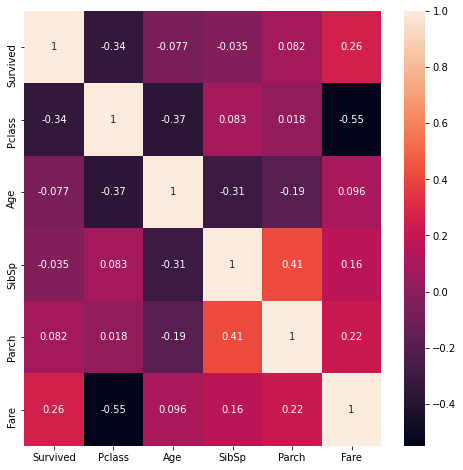

In [54]:
# heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

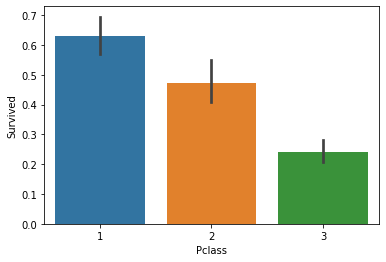

In [55]:
# barplot
sns.barplot(x="Pclass", y="Survived", data=df)
plt.show()

In [63]:
def funcion_graficas(feat):
    plt.subplot(2,1,1)
    df.groupby(feat).Survived.value_counts().plot(kind="bar")
    plt.figure(figsize=(12,8))
    plt.subplot(2,1,2)
    sns.barplot(x=feat, y="Survived", data=df)
    plt.show()
    

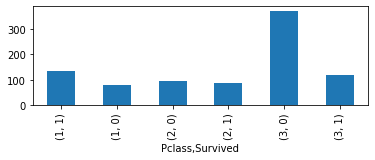

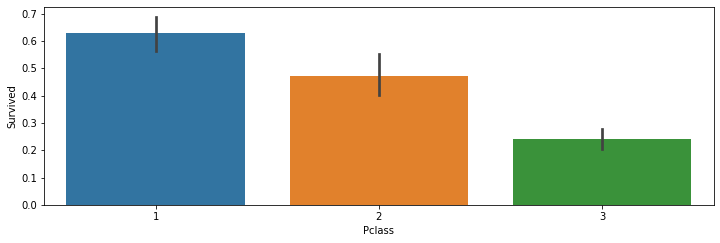

In [64]:
funcion_graficas("Pclass")

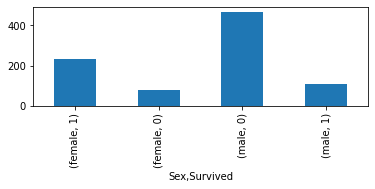

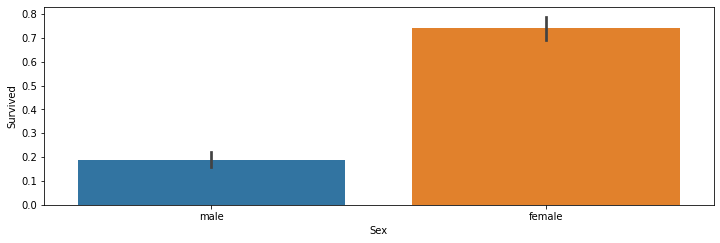

In [65]:
funcion_graficas("Sex")

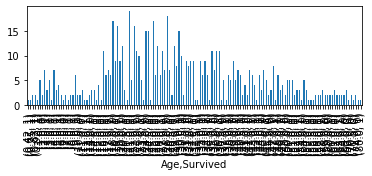

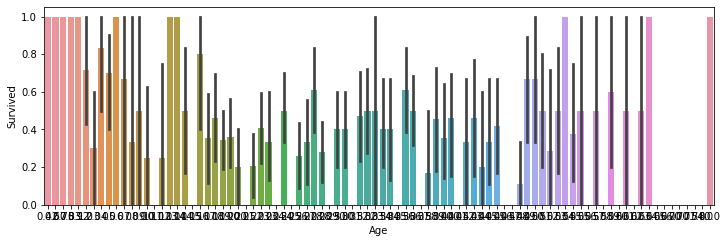

In [66]:
funcion_graficas("Age")

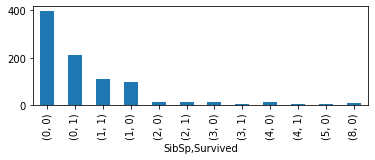

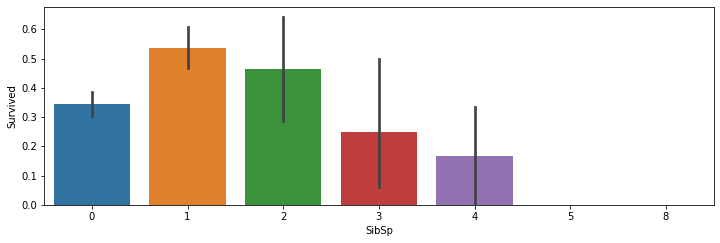

In [67]:
funcion_graficas("SibSp")

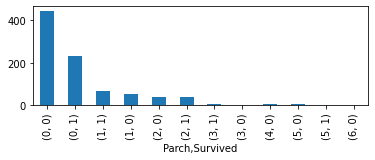

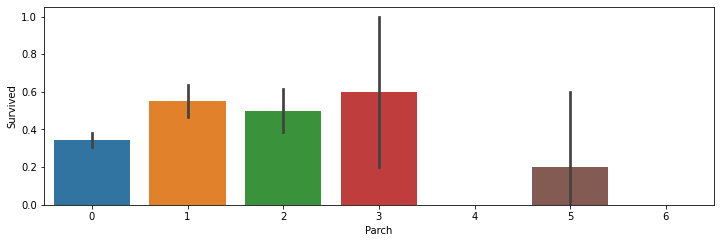

In [68]:
funcion_graficas("Parch")

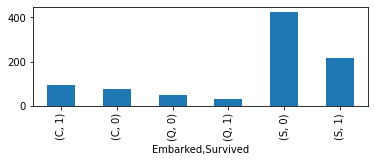

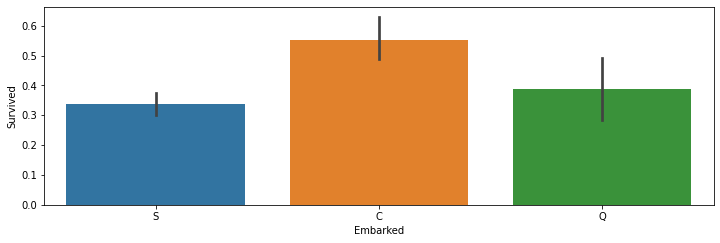

In [69]:
funcion_graficas("Embarked")

## Actividad 2

**Segunda parte de la actividad 4**: (hasta 4 puntos)

**Pregunta -1-**

Si estás trabajando con un set de datos, y necesitas ver rápidamente la información de una columna con un gráfico. ¿Qué librería usarías? ¿Por qué? Si quieres puedes añadir un ejemplo. No es necesario, no obstante.

**Respuesta**: 

La librería ideal para ver la información de set de datos, y especificamente de una columna, es ***pandas***. Esta librería permite todo tipo de manipulaciones y visualizaciones para así entender de manera rápida el tipo de datos con el que se trabaja. Convirtiendo el set de datos a un *dataframe* y usando la librería se puede: hacer una exploracion, filtrar los datos, seleccionar columnas, agrupar por variables o condiciones, manipular y transformar los datos, sacar valores estadisticos refernetes a valores máximos, mínimimos, medias o distrobuciones, identificar valores faltantes y valores anómalos. Ademas permite hacer gráficos sencillos y bastante informativos sin necesidad de tener que importar otras librerías. 

**Pregunta -2-**

¿Te parece difícil la forma en que creamos “nuevos DataFrames”? (seleccionando solo ciertas filas o columnas, bajo ciertas condiciones o premisas).

Nota: Sobre esto hemos hablado en el punto 5 del Manual

(Esta parte será puntuada solamente por el mero hecho de responder a la misma, independientemente de lo que se diga).
Se trata de yo saber lo que habéis avanzado.

Esta materia, o algo muy similar, probablemente se explique nuevamente en asignaturas posteriores. (En Machine Learning, quizá).

**Respuesta**: 

No, crear subset de datos a través de filtraciones y selecciones es bastante rápido usando python y pandas. Además, la sitaxis permite indetificar de manera sencilla, incluso siendo nuevo en la programación, el tipo de filtrado o selección que se han hecho.

**Pregunta -3-**

Busca algo de información acerca de “Heatmap” y explica con tus palabras lo que consideres oportuno
Puedes añadir ejemplos o lo que quieras.

**Respuesta**: 

*Heatmap*, o mapa de calor en español, son gráficos que permiten identificar (a traves de una escala de colores) distribuciones, correlaciones o comportamientos de los datos. Por ejemplo, hacer la correlacion entre las variables de un data set y luego realizar un heatmap permite identificar las variables más correlacionadas entre si. Otro ejemplo seria seleccionar dos variables, una numérica y otra categórica por ejemplo, y realizar una especiede de histograma. Otro ejemplo seria crear un heatmap con los retornos diarios de dieferentes acciones de la bolsa e identificar periodos de alta o baja volatilidad. 

**Pregunta -4-**

Hemos usado diferentes tipos de gráficos.

¿Se entiende bien cuando usar un “violinplot” o un “factorplot” por ejemplo?

¿Serías capaz de emplearlo en otro set de datos?

(Esta parte de la actividad será puntuada solamente por el mero hecho de ser respondida, independientemente de lo que se diga).

Recuerda que existen más tipos de Gráficos, no obstante, y lo más importante es la “extracción de información” de los mismos.

**Respuesta**: 

El violinplot, asi como el boxplot, son tipos de gráficos que permiten identificar la distribución de los datos, identificar la media de los mismos, valores máximos y valores mínimos. Por su parte el factorplot permite visualizar el comportamiento, o como se relacionan, variables categoricas entre si.